In [ ]:
%matplotlib inline
import requests
import bs4
import numpy as np
import pandas as pd
from IPython.display import HTML

# Announcements

* Midterm Thursday
* Cheat-sheet will be provided

# Parsing HTML

## Outline
* DOM
* Parsing HTML
* API requests

## Last time

* HTTP Requests:
    * GET, POST, HEAD
    * Status codes
* Data of the Internet:
    * HTML, JSON
    * json.loads
* Scraping vs. APIs

## What is HTML?

* HTML (HyperText Markup Language) is the most basic building block of the Web. 
* It defines the content and layout of a webpage.
* It is what you get back when you scrape a webpage.
* HTML markup includes special "elements" (tags) such as 
    * `<head>, <title>, <body>, <p>, <div>, <img>`,.....
    

See [this tutorial](http://fab.academany.org/2018/labs/fablaboshanghai/students/bob-wu/Fabclass/week2_project_management/HTML.html) for more reference.

In [ ]:
!cat data/lec10.html

In [ ]:
!cat data/lec10_pic_ref.html

In [ ]:
# Display an HTML page, inline
from IPython.display import HTML
HTML(open('data/lec10_pic_ref.html').read())

### The Anatomy of HTML

* **HTML Document**: the totality of markup that makes up a web-page
* **Document Object Model**: the internal representation of a HTML document as a *tree* structure.

* **HTML Element**: An object in the DOM, such as a paragraph, header, title.
* **HTML Tags**: Markers that denote the *start* and *end* of an element. E.g. `<p>` and `</p>`.



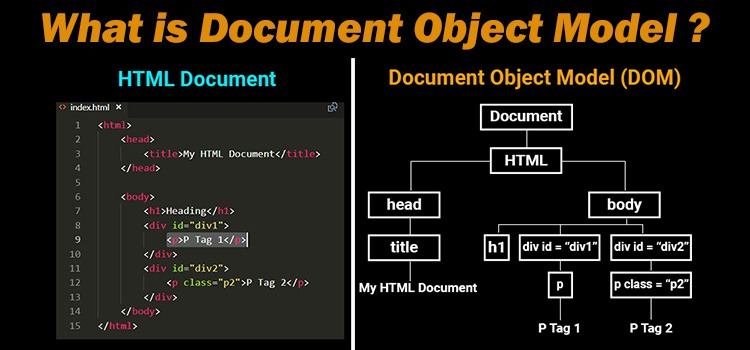

In [ ]:
!cat data/lec10.html

### HTML Tags

HTML tags define both:
* document structure elements and 
* document head/body elements.

<img src="imgs/webpage_anatomy.png" width="50%">

### Useful tags to know:

|Structure Elements|Description|Head/Body Elements|Description|
|---|---|---|---|
|`<html>`|the document|`<p>`|the paragraph|
|`<head>`|the header|`<h1>, <h2>, ...`|header(s)|
|`<body>`|the body|`<img>`|images|
|`<div>` |a logical division of the document|`<a>`| anchor (hyper-link)|
|`<span>`|an *in-line* logical division|[MANY MORE](https://en.wikipedia.org/wiki/HTML_element)||


### Example: Images and Hyperlinks

* Tag for a picture (can use a link to the image):
```
<img src="HumDum.png" alt="Humbpty Dumpty">
```

* Tag for a hyperlink: 

```
<a href="https://ucsd.edu/">Visit our page on the World Wide Web!</a>
```


## div tag

```
<div style="background-color:lightblue">
  <h3>This is a heading</h3>
  <p>This is a paragraph.</p>
</div>
```

* The `<div>` tag defines a division or a section in an HTML document.

* The `<div>` element is often used as a container for other HTML elements to style them with CSS or to perform certain tasks with JavaScript.

* Often has attributes (important for scraping!)


## The HTML Document Tree

* DOM represents a document as a logical tree.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

</div>    

Draw a DOM (tree) yourself!

## The HTML Document Tree

* DOM represents a document as a logical tree.
* Unlike in DSC 40B, child nodes are ordered.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

<img src="imgs/dom_tree.png" width="50%">

</div> 

### Question: "quotes collection" website

* What do you think the DOM tree look like? (roughly)
* What would your table schema (i.e. rows/columns) look like?

<img src="imgs/quotes2scrape.png">

### Example (rough) document tree

* How you would you parse it, if you wanted to collect data:
    - Quote-by-quote (all attributes)?
    - Attribute-by-attribute?
    
<div class="image-txt-container">

<img src="imgs/quotes2scrape.png" width="50%">
    
<img src="imgs/quote_dom.png" width="50%">

</div> 

## BeautifulSoup: parsing the document tree

* [Beautiful Soup 4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a python HTML parser.
* **Warning:** BeautifulSoup has changed between versions, so make sure you are looking at documentation for the version you are using (4 here).

* Parse a small HTML "page", with corresponding tree below:

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
s = '''
<body>

  <div id="content">
    <h1>Heading here</h1>
    <p>My First paragraph</p>
    <p>My <em>second</em> paragraph</p>
    <hr>
  </div>
  
  <div id="nav">
    <ul>
      <li>item 1</li>
      <li>item 2</li>
      <li>item 3</li>
    </ul>
  </div>

</body>
'''

In [ ]:
# we can render it

HTML(s)

### BeautifulSoup Parsing

* `bs4.BeautifulSoup` parses a string or file-like object representing HTML
* Returns a *parsed document*
* Use the `children` property to access child nodes.

In [ ]:
# builder: what we use to parse HTML
#help(bs4.BeautifulSoup)

In [ ]:
print(s)

In [ ]:
# usually s is a result of a GET request
soup = bs4.BeautifulSoup(s)
soup

In [ ]:
# DOM object, tree structure
type(soup)

In [ ]:
# many useful attributes 
# print just the text
print(soup.text)

### Child Nodes

- The document is a tree.
- The BeautifulSoup object is a *node* in the tree.
- It has 0 or more child nodes.

In [ ]:
soup.children

### Detour: iterators

In [ ]:
lst = [1,2,3,4]
double = map(lambda x: x*2, lst)
double
# what is the output?

In [ ]:
next(double)

In [ ]:
list(double)

### Child nodes

In [ ]:
# what is the list iterator?
# Why are they useful?
for child in soup.children:
    print(child)
    print('-' * 80)

### Child nodes

In [ ]:
root = list(soup.children)[0]
root

In [ ]:
for child in root:
    print(child)
    print('-' * 80)

### Child nodes

In [ ]:
body = next(root.children)

In [ ]:
print(body.prettify())

In [ ]:
for child in body:
    print(child)
    print('-' * 80)

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
soup

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
# depth first search

def dfs(elt):
    print(elt.name)
    for e in elt.children:
        if not isinstance(e, str):
            dfs(e)

In [ ]:
dfs(soup)

In [ ]:
# DFS using `descendants` property

for x in soup.descendants:
    if isinstance(x, str):
        continue       
    print(str(x.name))

## Selecting attributes of nodes
* The `.text` property of a tag element gets the text elements between the tags.
* The `.attrs` property lists all attributes of a tag.
* The `.get(key)` method, gets the value of a tag attribute.

In [ ]:
# iterator, follows DFS order
hdr = list(soup.descendants)[5]

In [ ]:
hdr

In [ ]:
hdr.text

In [ ]:
hdr.attrs

In [ ]:
# key: id

div = list(soup.descendants)[20]
div

In [ ]:
div.attrs

In [ ]:
div.get('id')

In [ ]:
div.text

## Selecting subtrees of the document tree

* Use the BeautifulSoup methods `find_**` to select subtrees
* `soup.find(name=None, attrs={}, recursive=True, text=None, **kwargs)`

## Selecting subtrees of the document tree

* Using `soup.find('div')`:


<div class="image-txt-container">
    
<img src="imgs/dom_tree_1.png" width="50%">
  
<img src="imgs/dom_subtree_1.png" width="40%">
    
</div>

In [ ]:
div = soup.find('div')
div

In [ ]:
type(div)

In [ ]:
# more specifi
soup.find('div', attrs={'id': 'nav'})

In [ ]:
# will recurse into tree until it finds something
soup.find('ul')

In [ ]:
# all divs
soup.find_all('div')

In [ ]:
lsts = soup.find_all('li')
lsts

In [ ]:
[x.text for x in soup.find_all('li')]

### Example

- Get the seminars and their dates from https://datascience.ucsd.edu/
- hint: use browser's inspect tool

In [ ]:
response = requests.get('https://datascience.ucsd.edu/')

# Example: Scraping Quotes

### Scraping Quotes

go to http://quotes.toscrape.com/

### Example: scraping quotes
* Collect famous quotes and related data
* Requires scraping many pages to get data
* Parse the pages to extract information

<img src="imgs/quotes2scrape.png" width="50%">

### The plan

- `download_page(n)`
    Downloads and parses page `n` from the website.
- `parse_page(n)`
    Parses HTML into a dictionary with keys: `quote`, `author`, `tags`.
    
**Tip 1:** Have functions that request and functions that parse, but not both! 
    - Easier to debug and catch errors!
    - Avoids unnecessary requests!
    
**Tip 2:** Make lots of helper functions!

In [ ]:
# live demo

### Scraping quotes: conclusion

* Make as few requests as possible
* Create a request/parsing plan *beforehand*
* Create your output schema *beforehand*
* Separate parsing and requests into different functions!

# Nested vs. Flat Data Structures

## Nested vs flat data structures

* Nested: HTML, JSON, XML
* Flat: CSV

Suppose we obtained the quotes data via an API and saved it to the file `quotes2scrape.json`
- `quotes2scrape.json` is a 'json records file'; each line is a valid json object

In [ ]:
import json
json.loads(open('data/quotes2scrape.json').readline())

In [ ]:
# read in all the lines: each element is a dictionary
L = [json.loads(x) for x in open('data/quotes2scrape.json')]

In [ ]:
# What happended to the tags column?
df = pd.DataFrame(L)
df.head()

In [ ]:
distinct_tags = np.unique(df.tags.sum())

In [ ]:
def list2series(taglist):
    return pd.Series({k:1 for k in taglist})

tags = df.tags.apply(list2series)
tags.head()

In [ ]:
# combine them
pd.concat([df, tags], axis=1)

### Converting JSON to CSV

* Flattening the nested list requires a lot of space. Why?
* We can't always read in *all* the JSON; might need to extract just what we need line-by-line.
* A JSON records file is **not** valid JSON. Why? Why can't we just use JSON?

# API requests



## APIs vs Scraping

- APIs allow for authentication (and access to sensitive data).
- APIs have more reliable data that is easier to parse.
- APIs allow hosts to monitor usage and protect their website


## APIs vs Scraping
    
* Scraping mimics the browser and is uncontrolled like normal browsing.
    - Many rapid requests to a small site can take down the host server.
    - Many rapid requests to a small site can cost the owner money
    - Always be respectful and responsible when scraping!

## What is an API?

* APIs are url endpoints dedicated for programmatic requests setup by the website host.

* **An endpoint** is a server route that is used to retrieve different data from the API. 

For example, on the Reddit API:
* the `/comments` endpoint retrieves information about comments, 
* the `/users` endpoint might retrieve data about users. 

To access them, you would add the endpoint to the base url of the API.

## Why APIs are *always* better

* The data is changing quickly. 
    - E.g. stock price data: don't want to scrape a page every few minutes!
* You want a small piece of a much larger set of data. 
    - What if you want to just pull your own comments on Reddit? (all is too much)
    - What if you want your Google GPS history? (private)
* You want usability and stability, not changing HTML requiring translation.
    - Websites change *all the time!*

## API requests

* API requests are just GET/POST requests to a specially maintained URL.
* Below is `okpy` (DSC 10) grading API

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/")

# Print the status code of the response. Are we in trouble?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3.json")

# Print the status code of the response. and now?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/version/")

# Print the status code of the response. and now??
print(response.status_code)
print(response.content)

# print(json.loads(response.content))

### Example API request

* Submit an assignment

<img src="imgs/okpy_request.png" width="50%">

### Example API request

* Submit a score after grading the HW
* Notice the authentication token!

<img src="imgs/okpy_get.png" width="50%">

### Should I use an API or build a scraper?

Taken from [a journalist's talk](http://www.storybench.org/to-scrape-or-not-to-scrape-the-technical-and-ethical-challenges-of-collecting-data-off-the-web/)
<img src="imgs/flowchart_final.jpeg" width="75%">